In [9]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20180306-3).
0 upgraded, 0 newly installed, 0 to remove and 24 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/n

In [10]:
import numpy as np
import matplotlib.pyplot as plt


plt.rc('font', family='NanumBarunGothic')
plt.rc('axes', unicode_minus=False)
# 그런데 보통 한글 글꼴에는 유니코드 마이너스(−)가 없고
# 일반 마이너스(-) 기호만 있습니다.
# 눈으로 보기에는 비슷해보이지만 다른 글자입니다.
# 따라서 유니코드 마이너스 기호를 쓰지 않도록 설정해줍니다.

In [11]:
def f1(x):
    return (x - 2) ** 2 + 2

def f1d(x):
    """f1(x)의 도함수"""
    return 2 * (x - 2.0)

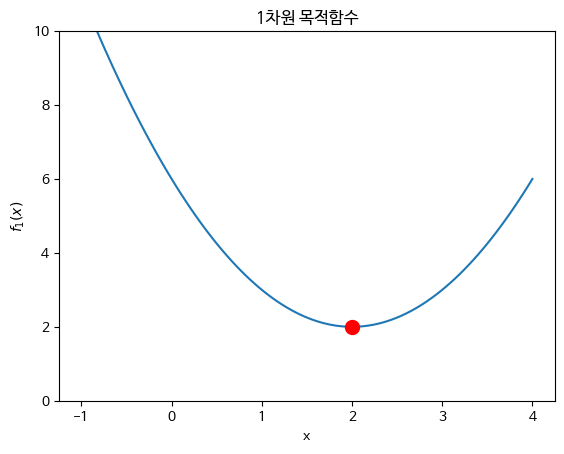

In [21]:
xx = np.linspace(-1, 4, 100)
plt.plot(xx, f1(xx))
plt.plot(2, 2, 'ro', markersize=10)
plt.ylim(0, 10)
plt.xlabel("x")
plt.ylabel("$f_1(x)$")
plt.title("1차원 목적함수")
plt.show()

1차 시도: x_1 = 0.00, g_1 = -4.00


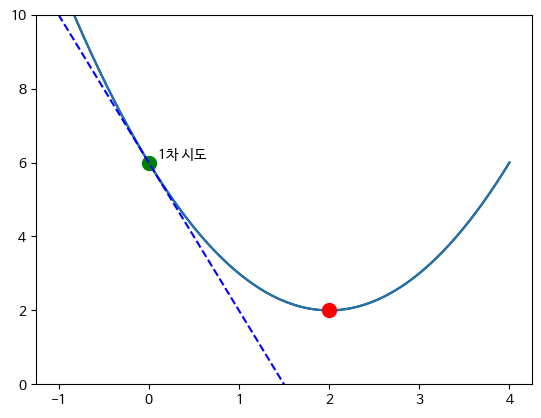

In [24]:
#-- -1 ~ 4 까지 100개 샘플
xx = np.linspace(-1, 4, 100)

plt.plot(xx, f1(xx), 'k-')
# step size
mu = 0.4

# k = 0
x = 0

plt.plot(xx, f1(xx))
plt.plot(2, 2, 'ro', markersize=10)
plt.ylim(0, 10)
plt.plot(x, f1(x), 'go', markersize=10)
plt.text(x + 0.1, f1(x) + 0.1, "1차 시도")
plt.plot(xx, f1d(x) * (xx - x) + f1(x), 'b--')

# f1(x)에서 접선 긋기
# plt.plot(xx, f1d(x)*xx, 'r--') 직선을 평행이동한 것
# x축으로 0 만큼, y축으로 6 만큼 평행이동한 직선이 접선이 됨
# f1d(x) * (xx[0] - x) + f1(x)   : 10
# f1d(x) * (xx[1] - x) + f1(x)  : 9.8
# f1d(x) * (xx[2] - x) + f1(x)  : 9.6
# f1d(x) * (xx[99] - x) + f1(x) : -10
print("1차 시도: x_1 = {:.2f}, g_1 = {:.2f}".format(x, f1d(x)))

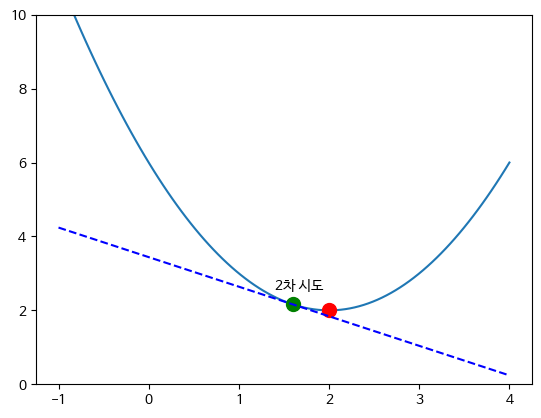

2차 시도: x_2 = 1.60, g_2 = -0.80


In [25]:
# k = 1
x = x - mu * f1d(x)
plt.plot(xx, f1(xx))
plt.plot(2, 2, 'ro', markersize=10)
plt.ylim(0, 10)

plt.plot(x, f1(x), 'go', markersize=10)
plt.text(x - 0.2, f1(x) + 0.4, "2차 시도" )
plt.plot(xx, f1d(x) * (xx - x) + f1(x), 'b--')
# plt.plot(xx, f1d(x)*xx, 'm--') 직선을 평행이동한 것
# x축으로 1.6 만큼, y축으로 2.16 만큼 평행이동한 직선이 접선이 됨

plt.show()
print("2차 시도: x_2 = {:.2f}, g_2 = {:.2f}".format(x, f1d(x)))

3차 시도: x_3 = 1.98, g_3 = -0.03


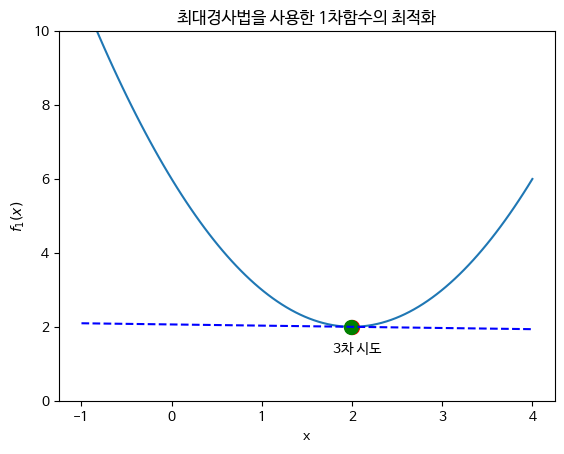

In [28]:
# k = 2
x = x - mu * f1d(x)
plt.plot(xx, f1(xx))
plt.plot(2, 2, 'ro', markersize=10)
plt.ylim(0, 10)

plt.plot(x, f1(x), 'go', markersize=10)
plt.text(x - 0.2, f1(x) - 0.7, "3차 시도")
plt.plot(xx, f1d(x) * (xx - x) + f1(x), 'b--')
# plt.plot(xx, f1d(x)*xx, 'c--') 직선을 평행이동한 것
# x축으로 1.92 만큼, y축으로 2.0064 만큼 평행이동한 직선이 접선이 됨

print("3차 시도: x_3 = {:.2f}, g_3 = {:.2f}".format(x, f1d(x)))

plt.xlabel("x")
plt.ylabel("$f_1(x)$")
plt.title("최대경사법을 사용한 1차함수의 최적화")
plt.ylim(0, 10)
plt.show()

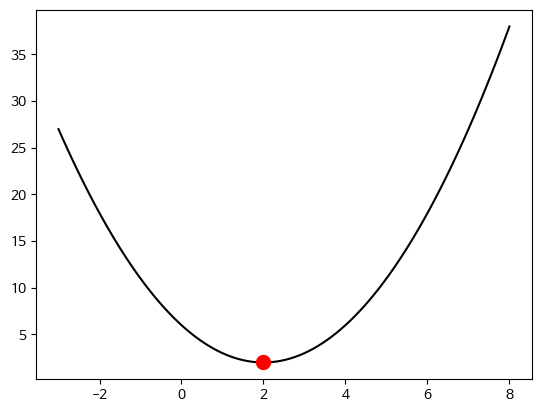

In [38]:
#-- learning late를 큰 값으로 변경

xx = np.linspace(-3, 8, 100)
plt.figure(2)
plt.plot(xx, f1(xx), 'k-')
plt.plot(2, 2, 'ro', markersize=10)
#plt.show()

# step size (너무 큰 값!)
mu = 1.1

1차 시도: x_1 = 0.00, g_1 = -4.00


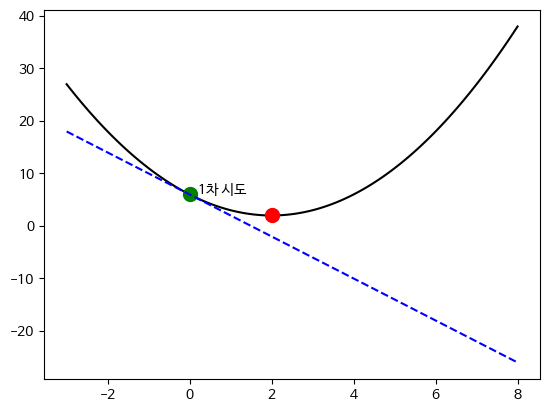

In [39]:
# k = 0
x = 0

plt.figure(2)
plt.plot(xx, f1(xx), 'k-')
plt.plot(2, 2, 'ro', markersize=10)

plt.plot(x, f1(x), 'go', markersize=10)
plt.text(x + 0.2, f1(x) + 0.1, "1차 시도")
plt.plot(xx, f1d(x) * (xx - x) + f1(x), 'b--')
print("1차 시도: x_1 = {:.2f}, g_1 = {:.2f}".format(x, f1d(x)))

2차 시도: x_2 = 4.40, g_2 = 4.80


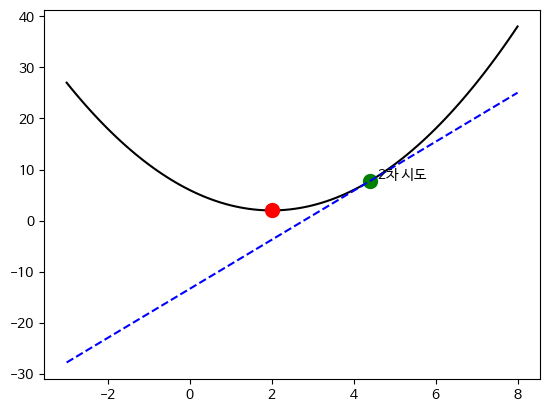

In [40]:
# k = 1
x = x - mu * f1d(x)

plt.figure(2)
plt.plot(xx, f1(xx), 'k-')
plt.plot(2, 2, 'ro', markersize=10)


plt.plot(x, f1(x), 'go', markersize=10)
plt.text(x + 0.2, f1(x) + 0.4, "2차 시도")
plt.plot(xx, f1d(x) * (xx - x) + f1(x), 'b--')
print("2차 시도: x_2 = {:.2f}, g_2 = {:.2f}".format(x, f1d(x)))


3차 시도: x_3 = -0.88, g_3 = -5.76


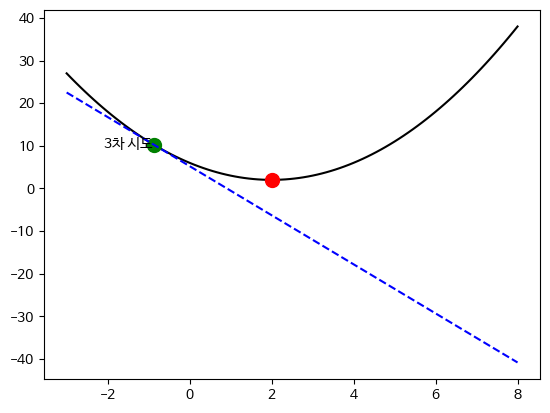

In [41]:
# k = 2
x = x - mu * f1d(x)

plt.figure(2)
plt.plot(xx, f1(xx), 'k-')
plt.plot(2, 2, 'ro', markersize=10)

plt.plot(x, f1(x), 'go', markersize=10)
plt.text(x - 1.2, f1(x) - 0.7, "3차 시도")
plt.plot(xx, f1d(x) * (xx - x) + f1(x), 'b--')
print("3차 시도: x_3 = {:.2f}, g_3 = {:.2f}".format(x, f1d(x)))\

4차 시도: x_3 = 5.46, g_3 = 6.91


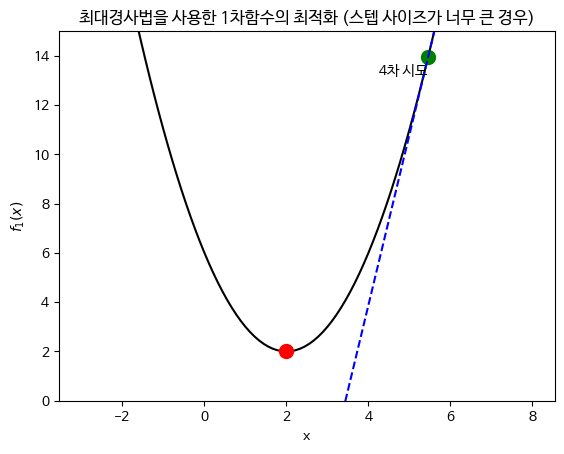

In [42]:
# k = 3 
x = x - mu * f1d(x)

plt.figure(2)
plt.plot(xx, f1(xx), 'k-')
plt.plot(2, 2, 'ro', markersize=10)
plt.plot(x, f1(x), 'go', markersize=10)
plt.text(x - 1.2, f1(x) - 0.7, "4차 시도")
plt.plot(xx, f1d(x) * (xx - x) + f1(x), 'b--')
print("4차 시도: x_3 = {:.2f}, g_3 = {:.2f}".format(x, f1d(x)))

plt.ylim(0, 15)
plt.xlabel("x")
plt.ylabel("$f_1(x)$")
plt.title("최대경사법을 사용한 1차함수의 최적화 (스텝 사이즈가 너무 큰 경우)")
plt.show()


/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52264 (\N{HANGUL SYLLABLE CA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 47785 (\N{HANGUL SYLLABLE MOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54632 (\N{HANGUL SYLLABLE HAM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPyth

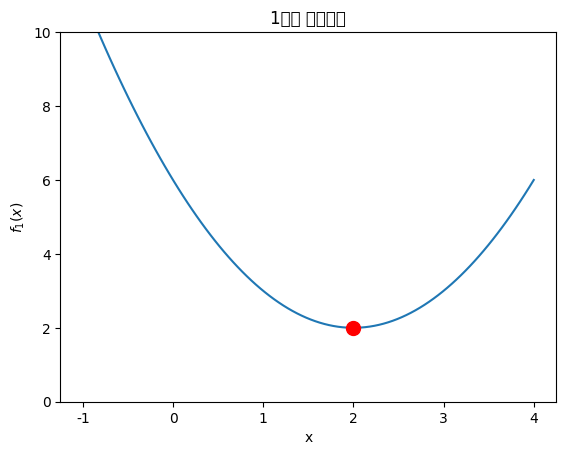

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46020 (\N{HANGUL SYLLABLE DO}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


1차 시도: x_1 = 0.00, g_1 = -4.00


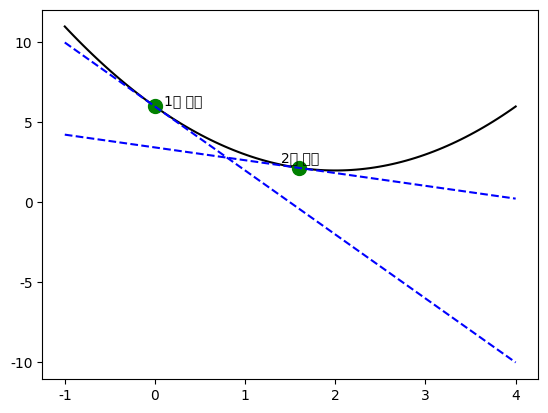

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 52572 (\N{HANGUL SYLLABLE COE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 45824 (\N{HANGUL SYLLABLE DAE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44221 (\N{HANGUL SYLLABLE GYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49324 (\N{HANGUL SYLLABLE SA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48277 (\N{HANGUL SYLLABLE BEOB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPy

2차 시도: x_2 = 1.60, g_2 = -0.80
3차 시도: x_3 = 1.92, g_3 = -0.16


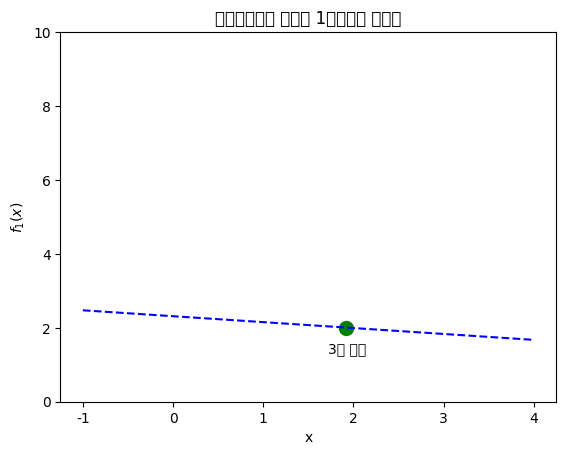

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53597 (\N{HANGUL SYLLABLE TEB}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51592 (\N{HANGUL SYLLABLE JEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/c

1차 시도: x_1 = 0.00, g_1 = -4.00
2차 시도: x_2 = 4.40, g_2 = 4.80
3차 시도: x_3 = -0.88, g_3 = -5.76
4차 시도: x_3 = 5.46, g_3 = 6.91


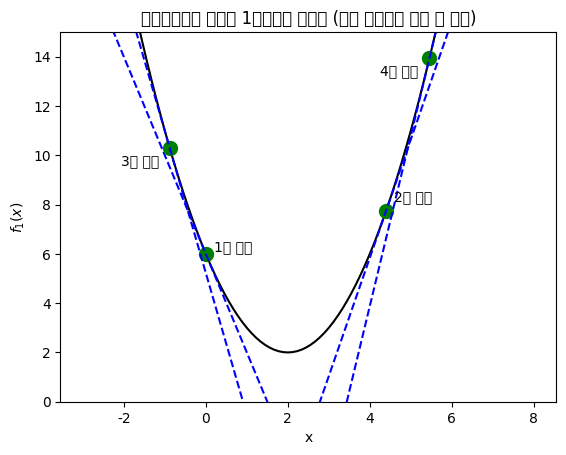

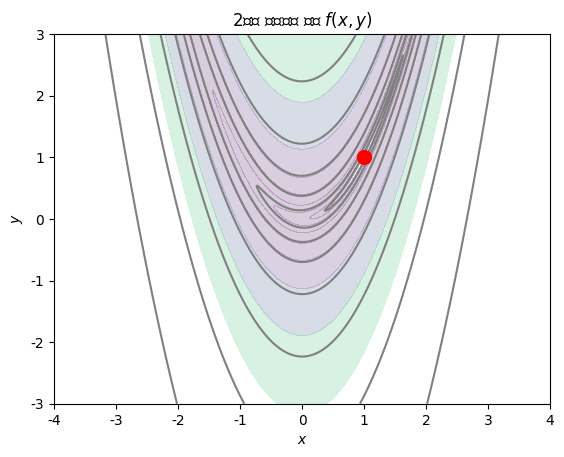

XX.shape: (1000, 1000)
YY.shape: (1000, 1000)


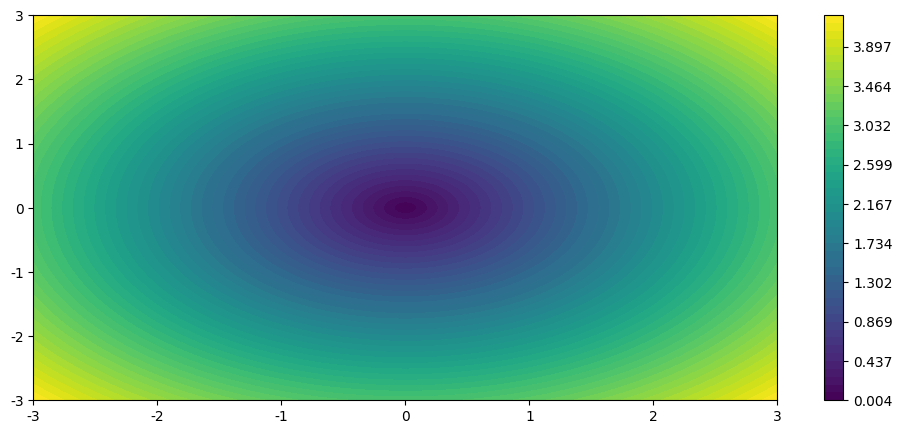

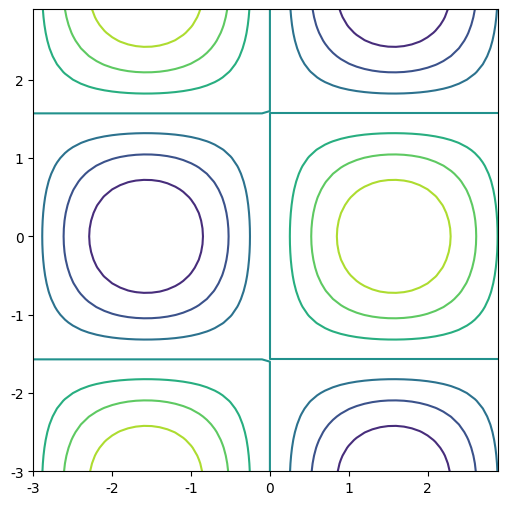

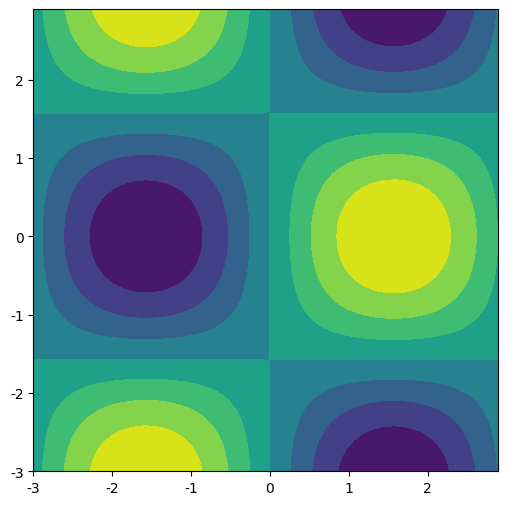

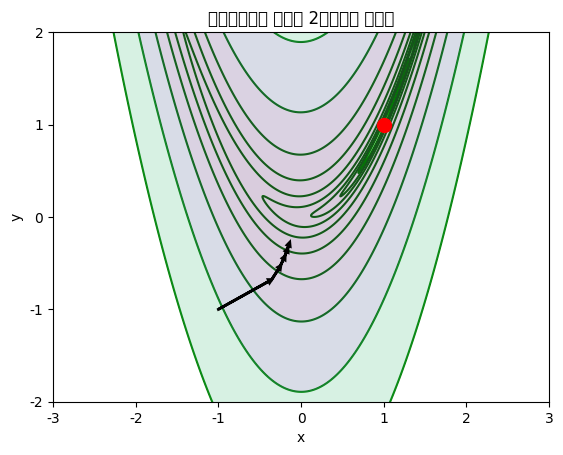

/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 51652 (\N{HANGUL SYLLABLE JIN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 46041 (\N{HANGUL SYLLABLE DONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54788 (\N{HANGUL SYLLABLE HYEON}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.9/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


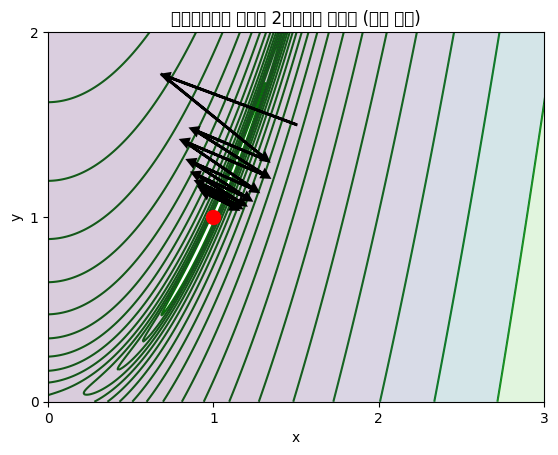

In [1]:



# 2차원 로젠브록 함수
def f2(x, y):
    return (1 - x)**2 + 100.0 * (y - x**2)**2

xx = np.linspace(-4, 4, 800)
yy = np.linspace(-3, 3, 600)
X, Y = np.meshgrid(xx, yy)
Z = f2(X, Y)

levels=np.logspace(-1, 3, 10)
plt.contourf(X, Y, Z, alpha=0.2, levels=levels)
plt.contour(X, Y, Z, colors="gray",
            levels=[0.4, 3, 15, 50, 150, 500, 1500, 5000])
plt.plot(1, 1, 'ro', markersize=10)

plt.xlim(-4, 4)
plt.ylim(-3, 3)
plt.xticks(np.linspace(-4, 4, 9))
plt.yticks(np.linspace(-3, 3, 7))
plt.xlabel("$x$")
plt.ylabel("$y$")
plt.title("2차원 로젠브록 함수 $f(x,y)$")
plt.show()

# https://frhyme.github.io/python-lib/python_contour/

Xmesh, Ymesh = np.meshgrid(np.linspace(-3.0, 3.0, 1000),
                     np.linspace(-3.0, 3.0, 1000)
                    )
# levels = np.linspace(Z.reshape(-1, 1).min(), Z.reshape(-1, 1).max(), 50)
# np.size(levels) = 50
print("XX.shape: {}".format(Xmesh.shape))
print("YY.shape: {}".format(Ymesh.shape))
Z = np.sqrt(Xmesh**2 + Ymesh**2 )

plt.figure(figsize=(12, 5))
"""levels에 구간을 넣어줘서 등고선 표시 위치를 정할 수 있습니다. 
"""
cp = plt.contourf(Xmesh, Ymesh, Z,
                 levels = np.linspace(Z.reshape(-1, 1).min(), Z.reshape(-1, 1).max(), 50)
                )
plt.colorbar(cp)
#plt.savefig('../../assets/images/markdown_img/draw_contour_20180529_1727.svg')
plt.savefig('draw_contour.svg')
plt.show()


# https://problemsolvingwithpython.com/06-Plotting-with-Matplotlib/06.14-Contour-Plots/

import numpy as np
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:
#matplotlib inline

x = np.arange(-3.0, 3.0, 0.1)
y = np.arange(-3.0, 3.0, 0.1)
X, Y = np.meshgrid(x, y)

Z = np.sin(X)*np.cos(Y)
fig, ax = plt.subplots(figsize=(6,6))

ax.contour(X,Y,Z)
plt.show()

# Matplotlib's ax.contourf() method is similar to ax.contour()
# except that ax.contourf() produces contour plots that are "filled".

import numpy as np
import matplotlib.pyplot as plt
# if using a Jupyter notebook, include:
# matplotlib inline

x = np.arange(-3.0, 3.0, 0.1)
y = np.arange(-3.0, 3.0, 0.1)

X, Y = np.meshgrid(x, y)

Z = np.sin(X)*np.cos(Y)

fig, ax = plt.subplots(figsize=(6,6))
ax.contourf(X,Y,Z)
plt.show()

##########
def f2g(x, y):
    """f2(x, y)의 도함수"""
    # 2차원 로젠브록 함수의 도함수
    # (1 - x)**2 + 100.0 * (y - x**2)**2
    return np.array((2.0 * (x - 1) - 400.0 * x * (y - x**2), 200.0 * (y - x**2)))

#다음 그림에  x=−1,y−1 에서 시작하여
# 최대경사법으로 최적점을 찾아나가는 과정을 그레디언트 벡터 화살표와 함께 보였다.

xx = np.linspace(-4, 4, 800)
yy = np.linspace(-3, 3, 600)
X, Y = np.meshgrid(xx, yy)
Z = f2(X, Y)

levels = np.logspace(-1, 3, 10)

plt.contourf(X, Y, Z, alpha=0.2, levels=levels)
plt.contour(X, Y, Z, colors="green", levels=levels, zorder=0)
plt.plot(1, 1, 'ro', markersize=10)
#plt.show() # debug 시에만 사용할 것

mu = 8e-4  # step size
s = 0.95  # for arrowhead drawing

'''''''''
# https://matplotlib.org/gallery/text_labels_and_annotations/arrow_simple_demo.html
import matplotlib.pyplot as plt
plt.figure(10)
ax = plt.axes()
ax.arrow(0, 0, 0.5, 0.5, head_width=0.05, head_length=0.1, fc='k', ec='k')
plt.show()
'''

x, y = -1, -1
for i in range(5): # 5000
    g = f2g(x, y)
    plt.arrow(x, y, -s * mu * g[0], -s * mu * g[1],
              head_width=0.04, head_length=0.04, fc='k', ec='k', lw=2)
    x = x - mu * g[0]
    y = y - mu * g[1]

plt.xlim(-3, 3)
plt.ylim(-2, 2)
plt.xticks(np.linspace(-3, 3, 7))
plt.yticks(np.linspace(-2, 2, 5))
plt.xlabel("x")
plt.ylabel("y")
plt.title("최대경사법을 사용한 2차함수의 최적화" )
plt.show()



plt.figure(100)
# 로젠브룩함수를 x범위 0, 4까지, y 범위 0,3까지 확대해서 다시 그린다

xx = np.linspace(0, 4, 800)
yy = np.linspace(0, 3, 600)
X, Y = np.meshgrid(xx, yy)
Z = f2(X, Y)

levels = np.logspace(-1, 4, 20)

plt.contourf(X, Y, Z, alpha=0.2, levels=levels)
plt.contour(X, Y, Z, colors="green", levels=levels, zorder=0)
plt.plot(1, 1, 'ro', markersize=10)

mu = 1.8e-3  # 스텝 사이즈
s = 0.95  # 화살표 크기

x, y = 1.5, 1.5
for i in range(15):
    g = f2g(x, y)
    plt.arrow(x, y, -s * mu * g[0], -s * mu * g[1],
              head_width=0.04, head_length=0.04, fc='k', ec='k', lw=2)
    x = x - mu * g[0]
    y = y - mu * g[1]

plt.xlim(0, 3)
plt.ylim(0, 2)
plt.xticks(np.linspace(0, 3, 4))
plt.yticks(np.linspace(0, 2, 3))
plt.xlabel("x")
plt.ylabel("y")
plt.title("최대경사법을 사용한 2차함수의 최적화 (진동 현상)" )
plt.show()